# RMS Graph

Want to produce a root mean squared against speed (length - which is size of frame moving across the image making it appear to be moving) graph to show how the error and subsquent quality of the image changes compared to the 'still' object as the speed increases. Going to do this for rolling ball, for the natural and frequency ordered Hadamard patterns.

- First going to produce the RMS value for one length and then make a loop.

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time
from PIL import Image, ImageOps
from scipy.linalg import hadamard

- First reconstruct the image using natural ordered Hadamard and length of 0 and length of 50.

(-0.5, 63.5, 63.5, -0.5)

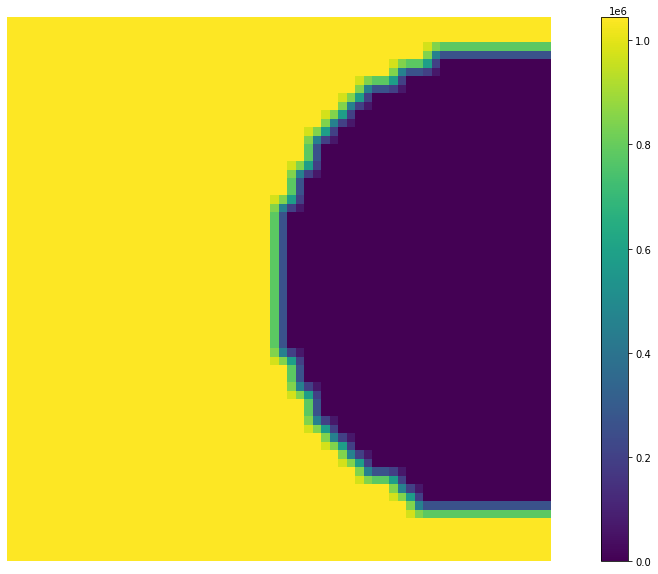

In [7]:
rc64 = "3.png"
raw_img = cv2.imread(rc64)
gray_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.resize(gray_img, (192,64)) 

# Convert to number array
objs = np.array(gray_img)
imsize = 64**2

H = hadamard(imsize)
m_test = np.zeros((imsize,1))

PatternSet = H     # natural ordered hadamard

length_zero = 0                    # Image appears more smeared the higher this number is - object is 'moving' faster - max is 128
allobjs_test = []
image_test = np.zeros((64,64))
# Measure for each pattern
for i in range(0,imsize):                                  # for each pixel value
    a = round(i*(length_zero/imsize))                           # i*(50/32^2) - moving through diff sections
    obj = objs[:,a:a+64]                                   # now obj changes for each measurement - simulates moving object
    allobjs_test.append(obj)
    samplingVector = PatternSet[i,:]                       # row index of pattern matrix and all columns - choosing each row from iden/hadamard matrix
    samplingPattern = np.reshape(samplingVector,(64,64))   # reshaping to image size, for each i the 1 moves along the rows of the matrices - reshapes each row of iden/hadamard matrix to sz x s
    m_test[i] = np.sum(samplingPattern * obj)                   # taking measurements, sum of patterns*image, there's a pattern for each zero in the zero array m - puts obj as a column vector basically
    image_test = samplingPattern * obj + image_test          # Image is the pattern multiplied by value + image for each index
    
recon_test = np.matmul(PatternSet,m_test)                    # recon is image formed by multiplying pattern used and signal
recon_test = np.reshape(recon_test, (64,64))
plt.rcParams['figure.figsize'] = [18,10] # set the image size
plt.imshow(recon_test)                  # can have image or recon for the plotted image
plt.colorbar()
plt.axis('off')

(-0.5, 63.5, 63.5, -0.5)

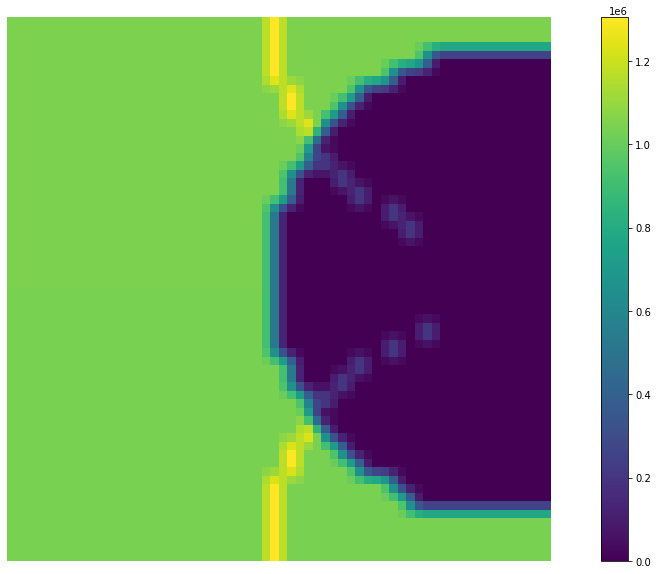

In [19]:
m_50 = np.zeros((imsize,1))
length_50 = 1                    # Image appears more smeared the higher this number is - object is 'moving' faster - max is 128
allobjs_50 = []
image_50 = np.zeros((64,64))
# Measure for each pattern
for i in range(0,imsize):                                  # for each pixel value
    a = round(i*(length_50/imsize))                           # i*(50/32^2) - moving through diff sections
    obj = objs[:,a:a+64]                                   # now obj changes for each measurement - simulates moving object
    allobjs_50.append(obj)
    samplingVector = PatternSet[i,:]                       # row index of pattern matrix and all columns - choosing each row from iden/hadamard matrix
    samplingPattern = np.reshape(samplingVector,(64,64))   # reshaping to image size, for each i the 1 moves along the rows of the matrices - reshapes each row of iden/hadamard matrix to sz x s
    m_50[i] = np.sum(samplingPattern * obj)                   # taking measurements, sum of patterns*image, there's a pattern for each zero in the zero array m - puts obj as a column vector basically
    image_50 = samplingPattern * obj + image_50          # Image is the pattern multiplied by value + image for each index
    
recon_50 = np.matmul(PatternSet,m_50)                    # recon is image formed by multiplying pattern used and signal
recon_50 = np.reshape(recon_50, (64,64))
plt.rcParams['figure.figsize'] = [18,10] # set the image size
plt.imshow(recon_50)                     # can have image or recon for the plotted image
plt.colorbar()
plt.axis('off')

 - Now define a function to determine rms. Variables of 0 length and 50 length images are recon_test and recon_50.Root mean squared is the sum squared difference: Mean of $\sqrt{(P-T)2}$ where P is the predicted outcome (length = 0) and target is the measured (all the other speeds).

In [20]:
def rmse(stationary, moving):
    return np.sqrt(np.mean((stationary - moving) ** 2))

In [25]:
rmse_test = rmse(recon_test,recon_50)
print(rmse_test)

44074.839579968975


In [36]:
# doing it manually as well
sub = np.subtract(recon_test, recon_50)
sub_squared = np.multiply(sub,sub)
sub_mean = np.mean(sub_squared)
rmse_test = np.sqrt(sub_mean)
print(rmse_test)

44074.839579968975


- Now make a loop for all speeds

In [31]:
speed = list(range(1,129))

# Read in the image
rc64 = "3.png"
raw_img = cv2.imread(rc64)
gray_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.resize(gray_img, (192,64)) 

# Convert to number array
objs = np.array(gray_img)
imsize = 64**2
H = hadamard(imsize)
PatternSet  =  H

allimgs_nat = []
for x in speed:
    m = np.zeros((imsize,1))
    image = np.zeros((64,64))
    
    for i in range(0,imsize):
        a = round(i*(x/imsize))                           # i*(50/32^2) - moving through diff sections
        obj = objs[:,a:a+64]                                   # now obj changes for each measurement - simulates moving object
        samplingVector = PatternSet[i,:]                       # row index of pattern matrix and all columns - choosing each row from iden/hadamard matrix
        samplingPattern = np.reshape(samplingVector,(64,64))   # reshaping to image size, for each i the 1 moves along the rows of the matrices - reshapes each row of iden/hadamard matrix to sz x s
        m[i] = np.sum(samplingPattern * obj)                   # taking measurements, sum of patterns*image, there's a pattern for each zero in the zero array m - puts obj as a column vector basically
        #image = samplingPattern * obj + image                  # Image is the pattern multiplied by value + image for each index
    recon = np.matmul(PatternSet,m)
    recon = np.reshape(recon,(64,64)) # recon is final image
    allimgs_nat.append(recon)

- Dividing by number of measurements:

In [62]:
measurement_num = 64**2
allimgs_nat = [i/measurement_num for i in allimgs_nat]
recon_test = recon_test/measurement_num

- Then find rmse for each image produced in the loop - all in allimgs_nat, when compared to when length = 0 which is the image recon_test

In [63]:
errs_nat = []
for i in allimgs_nat:
    rms = rmse(recon_test,i)
    errs_nat.append(rms)

- Then plot errs_nat on y axis and speed on x:

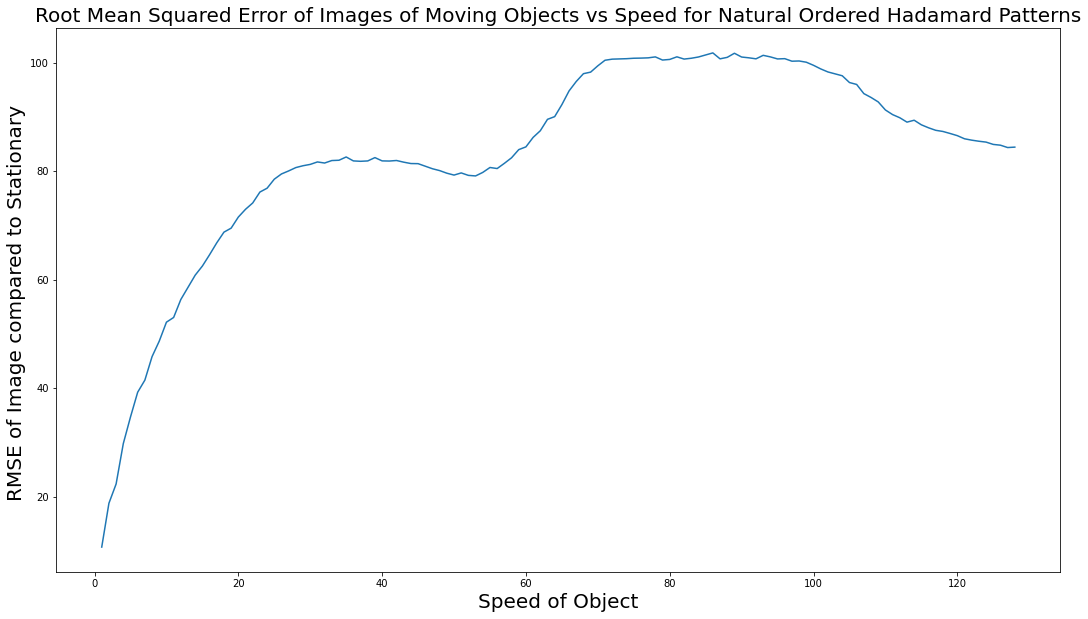

In [64]:
plt.plot(speed,errs_nat)
plt.rcParams['figure.figsize'] = [18,10]
plt.xlabel('Speed of Object')
plt.ylabel('RMSE of Image compared to Stationary ')
plt.title('Root Mean Squared Error of Images of Moving Objects vs Speed for Natural Ordered Hadamard Patterns')
plt.show()

### RMS for Frequency Ordered Hadamard

Doing the same thing for frequency ordered patterns:

- First creating an array of frequency ordered patterns (sorted_freqs)

In [27]:
sz = 64
patterns = []           # creating empty arrays to bring the patterns and freqs out the loop
freqs = []
for i in range(0,imsize):
    pattern = np.reshape(H[:,i],(sz,sz))
    freq = (np.sum(np.abs(np.diff(pattern,axis=0))) + np.sum(np.abs(np.diff(pattern,axis=1))))/8
    patterns.append(pattern)
    freqs.append(freq)
patterns = np.array(patterns)    # changing the lists to numpy arrays
freqs = np.array(freqs)
inds = freqs.argsort()           # sorting pattern matrices by the frequency number
sorted_h = patterns[inds]
sorted_freqs = sorted(freqs) 

- Testing for length 0 and 50
- length = 0 first:

(-0.5, 63.5, 63.5, -0.5)

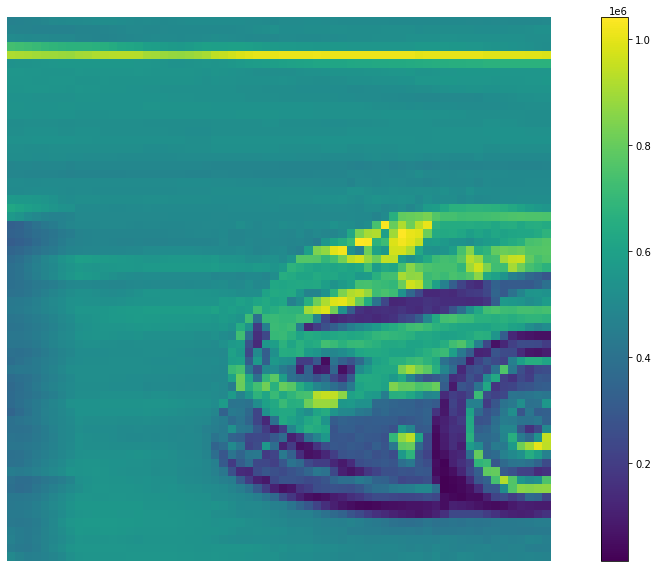

In [52]:
rc64 = "racecar64.jpg"
raw_img = cv2.imread(rc64)
gray_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.resize(gray_img, (192,64)) 

# Convert to number array
objs = np.array(gray_img)
# Make measurements
m_freq0 = np.zeros((imsize,1))
imsize = 64**2

length = 0                      # Image appears more smeared the higher this number is - object is 'moving' faster - max is 128
img_freq0 = np.zeros((64,64))
for i,j in zip(sorted_h,(range(0,imsize))):
    a = round(j*(length/imsize))
    obj = objs[:,a:a+64]
    m_freq0[j] = np.sum(i*obj)
    img_freq0 = img_freq0 + m_freq0[j]*i
plt.imshow(img_freq0)
plt.colorbar()
plt.axis('off')

- And length = 50

(-0.5, 63.5, 63.5, -0.5)

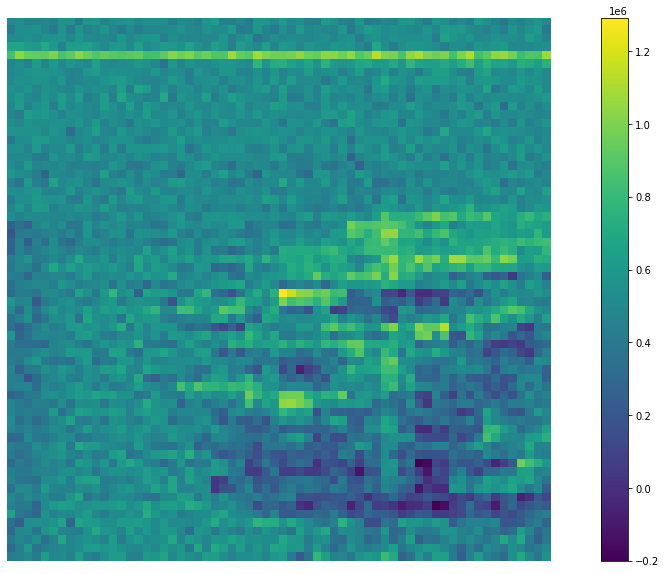

In [51]:
m_freq50 = np.zeros((imsize,1))

length = 50                      # Image appears more smeared the higher this number is - object is 'moving' faster - max is 128
img_freq50 = np.zeros((64,64))
for i,j in zip(sorted_h,(range(0,imsize))):
    a = round(j*(length/imsize))
    obj = objs[:,a:a+64]
    m_freq50[j] = np.sum(i*obj)
    img_freq50 = img_freq50 + m_freq50[j]*i
plt.imshow(img_freq50)
plt.colorbar()
plt.axis('off')

- Find RMS of these two test imgs - img_freq0 and img_freq50

In [37]:
rmse_test = rmse(img_freq0,img_freq50)
print(rmse_test)

140556.70992521133


This number is really big so need to scale the numbers down by dividing by the number of measurements

- Then making a loop for all speeds

In [38]:
allimgs_freq = []
for x in speed:
    m_freq = np.zeros((imsize,1))
    img_freq = np.zeros((64,64))
    for i,j in zip(sorted_h,(range(0,imsize))):
        a = round(j*(x/imsize))
        obj = objs[:,a:a+64]
        m_freq[j] = np.sum(i*obj)
        img_freq = img_freq + m_freq[j]*i
    allimgs_freq.append(img_freq)

- Dividing by number of measurements:

In [59]:
measurement_num = 64**2
allimgs_freq = [i/measurement_num for i in allimgs_freq]
img_freq0 = img_freq0/measurement_num

- Finding RMS between each image in allimgs_freq and the still image img_freq0

In [60]:
errs_freq = []
for i in allimgs_freq:
    rms = rmse(img_freq0,i)
    errs_freq.append(rms)

- Plotting:


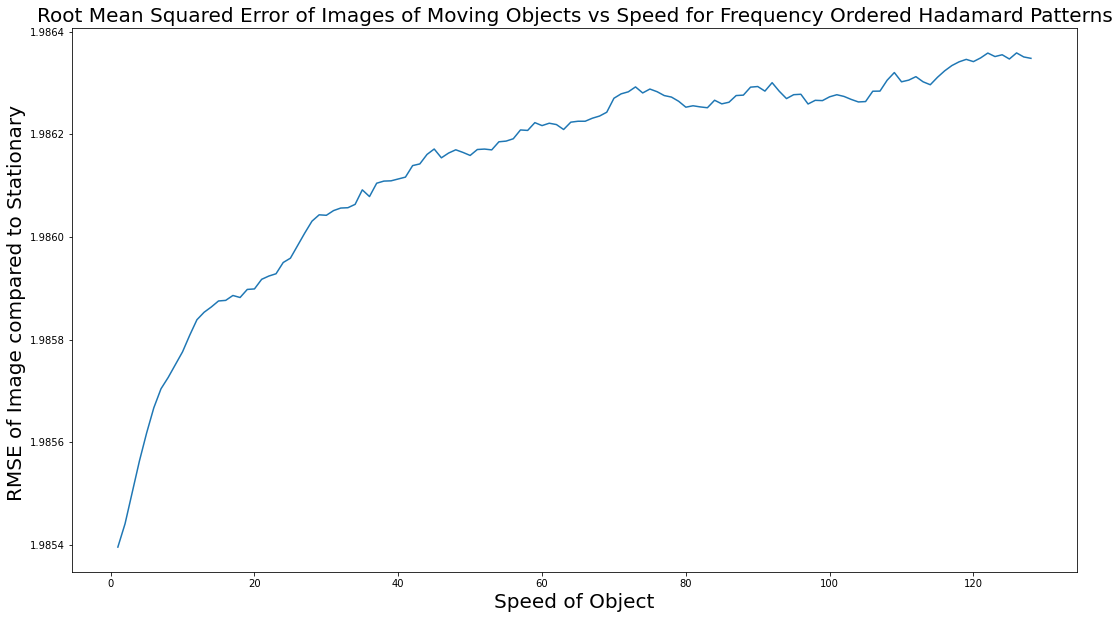

In [61]:
plt.plot(speed,errs_freq)
plt.rcParams['figure.figsize'] = [18,10]
plt.xlabel('Speed of Object')
plt.ylabel('RMSE of Image compared to Stationary ')
plt.title('Root Mean Squared Error of Images of Moving Objects vs Speed for Frequency Ordered Hadamard Patterns')
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.show()